In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
batch_size = 32
channels = 3
EPOCHS  = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Dataset/Train",
shuffle = True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size =batch_size)

Found 61200 files belonging to 36 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha']

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


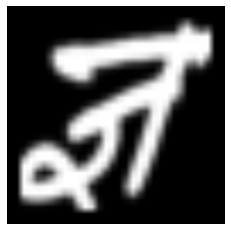

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

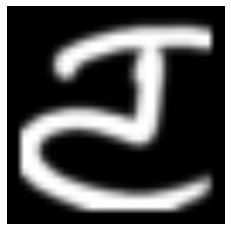

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.axis("off")

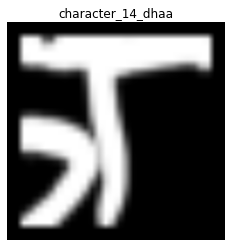

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

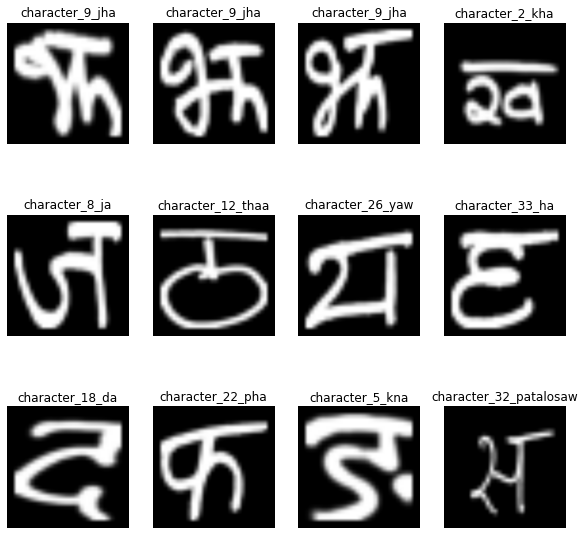

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split = 0.1,test_split=0.1,shuffle=True,shuffle_size = 100):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 20)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [13]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape = (batch_size,IMAGE_SIZE,IMAGE_SIZE,channels)
n_classes = 36

model = models.Sequential([
     resize_and_rescale,
     data_argumentation,
     
     layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
    
     layers.Flatten(), 
     
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax')
     
 ])
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

In [18]:
len(train_ds)

1530

In [20]:
%%time
histroy = model.fit(train_ds,epochs=35,batch_size = 64,validation_data =val_ds)

Epoch 1/35
1530/1530 [==============================] - 209s 137ms/step - loss: 1.2954 - accuracy: 0.6117 - val_loss: 1.1381 - val_accuracy: 0.6695
Epoch 2/35
1530/1530 [==============================] - 202s 132ms/step - loss: 1.1024 - accuracy: 0.6702 - val_loss: 0.9196 - val_accuracy: 0.7268
Epoch 3/35
1530/1530 [==============================] - 214s 140ms/step - loss: 0.9834 - accuracy: 0.7031 - val_loss: 0.9108 - val_accuracy: 0.7305
Epoch 4/35
1530/1530 [==============================] - 212s 138ms/step - loss: 0.9057 - accuracy: 0.7295 - val_loss: 0.8947 - val_accuracy: 0.7389
Epoch 5/35
1530/1530 [==============================] - 210s 137ms/step - loss: 0.8353 - accuracy: 0.7483 - val_loss: 0.7654 - val_accuracy: 0.7785
Epoch 6/35
1530/1530 [==============================] - 213s 139ms/step - loss: 0.7887 - accuracy: 0.7603 - val_loss: 0.6444 - val_accuracy: 0.7997
Epoch 7/35
1530/1530 [==============================] - 203s 133ms/step - loss: 0.7536 - accuracy: 0.7712 - val_

In [21]:
scores = model.evaluate(test_ds)

192/192 [==============================] - 17s 91ms/step - loss: 0.3873 - accuracy: 0.8812


In [22]:
scores

[0.38728177547454834, 0.8812010288238525]

In [23]:
histroy

In [24]:
histroy.params

{'verbose': 1, 'epochs': 35, 'steps': 1530}

In [25]:
histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
histroy.history['accuracy']

[0.6116625666618347,
 0.6702001690864563,
 0.703145444393158,
 0.7295343279838562,
 0.7483456134796143,
 0.7603145241737366,
 0.7711805701255798,
 0.7818219065666199,
 0.7924836874008179,
 0.7967524528503418,
 0.8043709397315979,
 0.8127655386924744,
 0.8148692846298218,
 0.8205269575119019,
 0.8244689702987671,
 0.8292279243469238,
 0.8325163125991821,
 0.8365604281425476,
 0.8392565250396729,
 0.8410335183143616,
 0.8404411673545837,
 0.8424632549285889,
 0.8487949371337891,
 0.8501225709915161,
 0.851838231086731,
 0.852532684803009,
 0.8537581562995911,
 0.8542687892913818,
 0.8571895360946655,
 0.8619689345359802,
 0.8576593399047852,
 0.8636233806610107,
 0.8626430034637451,
 0.8660539388656616,
 0.8642156720161438]

In [27]:
histroy.history['loss']

[1.2954450845718384,
 1.1024072170257568,
 0.9833885431289673,
 0.9057300686836243,
 0.8352901935577393,
 0.7886767387390137,
 0.7536056041717529,
 0.7141132950782776,
 0.686890184879303,
 0.6601935625076294,
 0.6416363716125488,
 0.6150158643722534,
 0.6001664996147156,
 0.5895452499389648,
 0.5733837485313416,
 0.563136637210846,
 0.5539939999580383,
 0.5366218090057373,
 0.524704098701477,
 0.5188370943069458,
 0.5171505808830261,
 0.507194995880127,
 0.49919331073760986,
 0.4884834587574005,
 0.48114922642707825,
 0.47998175024986267,
 0.47583600878715515,
 0.4691784381866455,
 0.4662376940250397,
 0.45053935050964355,
 0.45843327045440674,
 0.44580385088920593,
 0.4482303261756897,
 0.441691130399704,
 0.438192754983902]

In [28]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']

loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

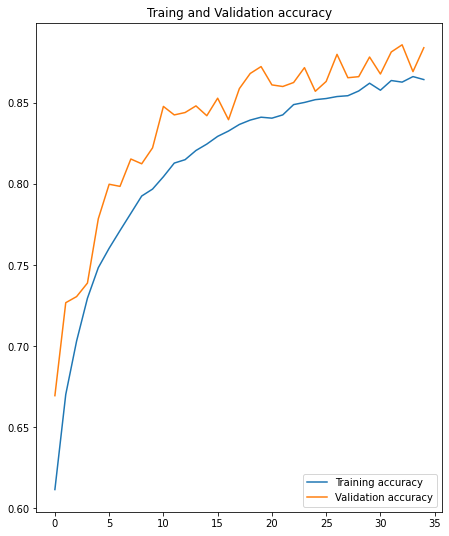

In [29]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

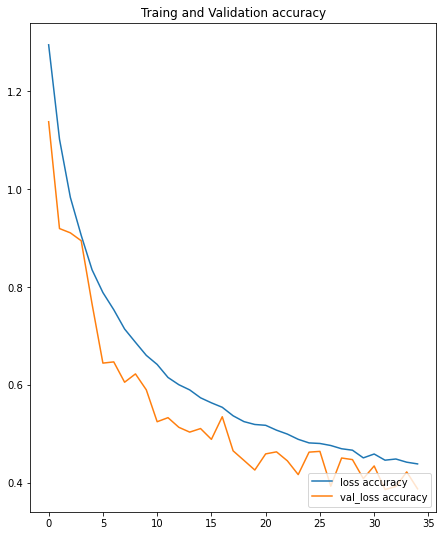

In [30]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

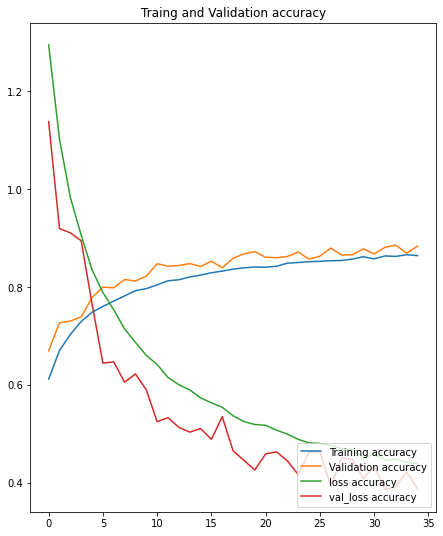

In [31]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

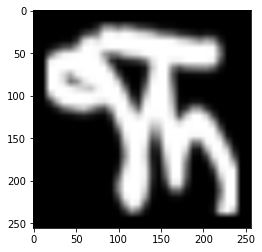

In [33]:
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

In [34]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

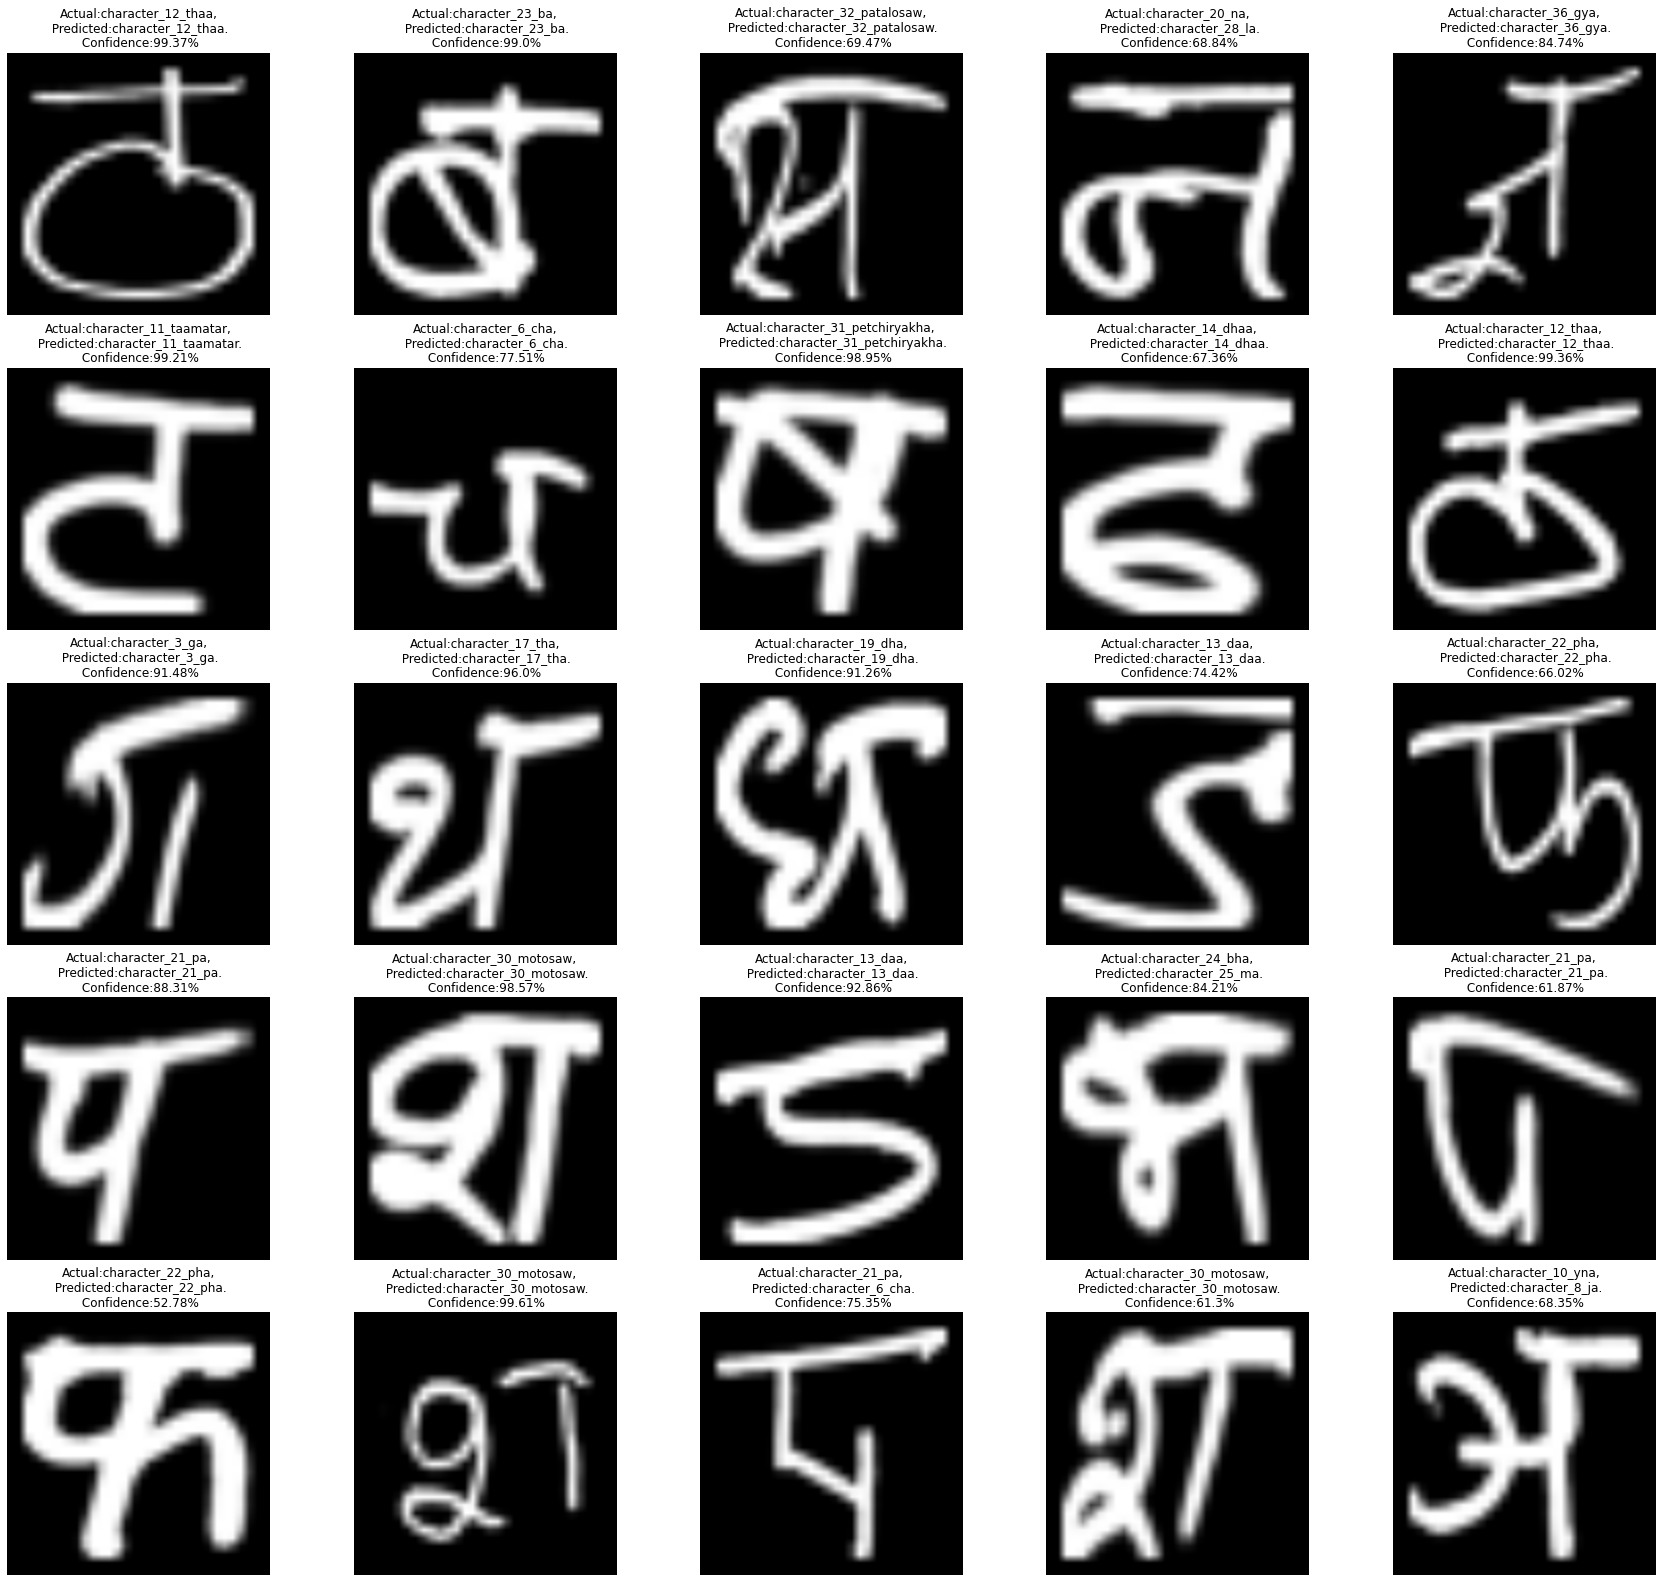

In [35]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

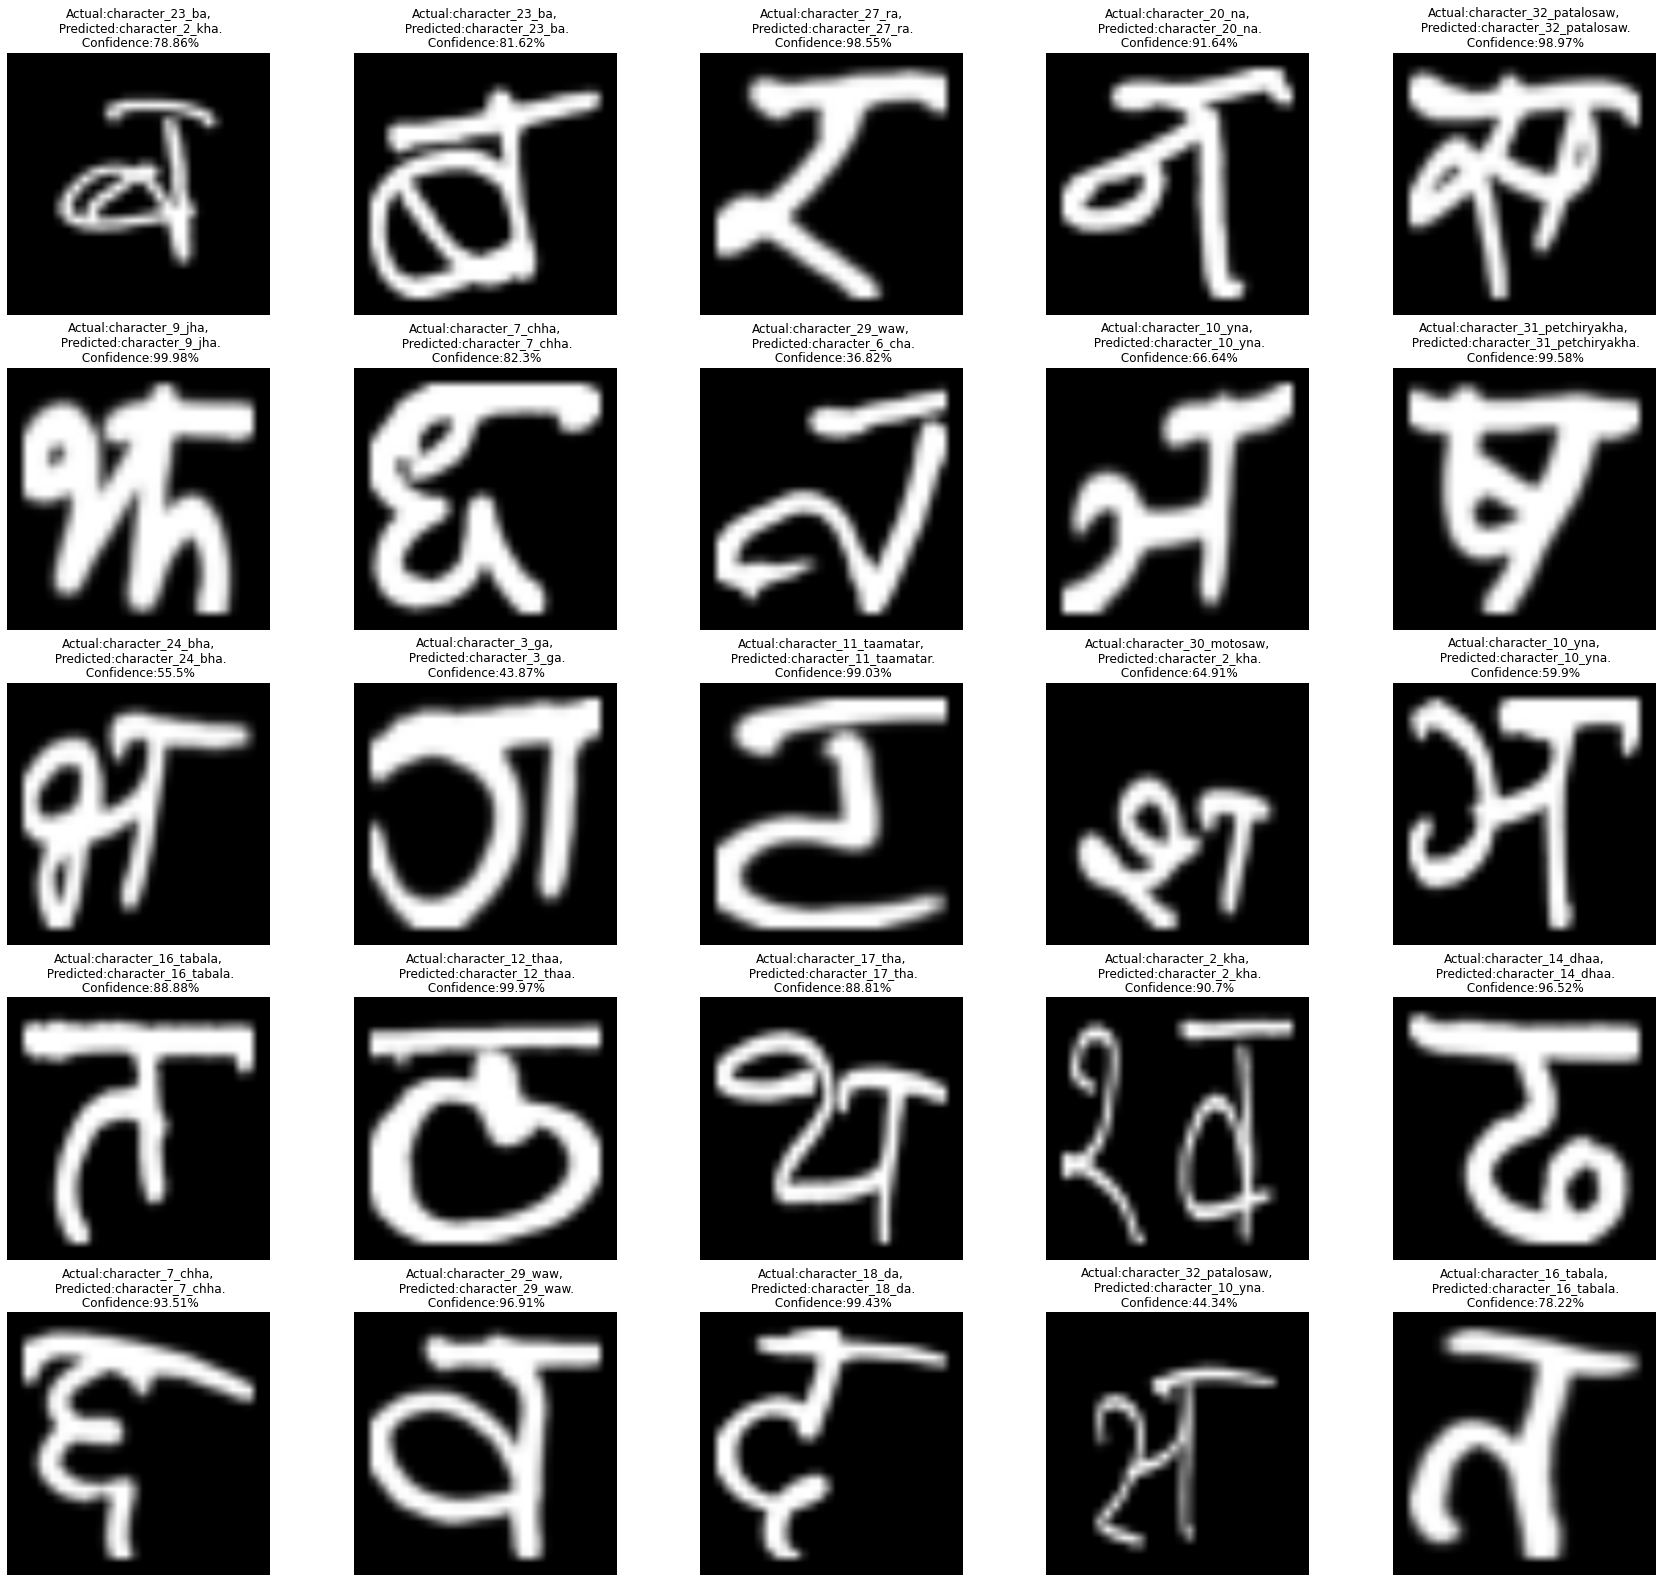

In [36]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

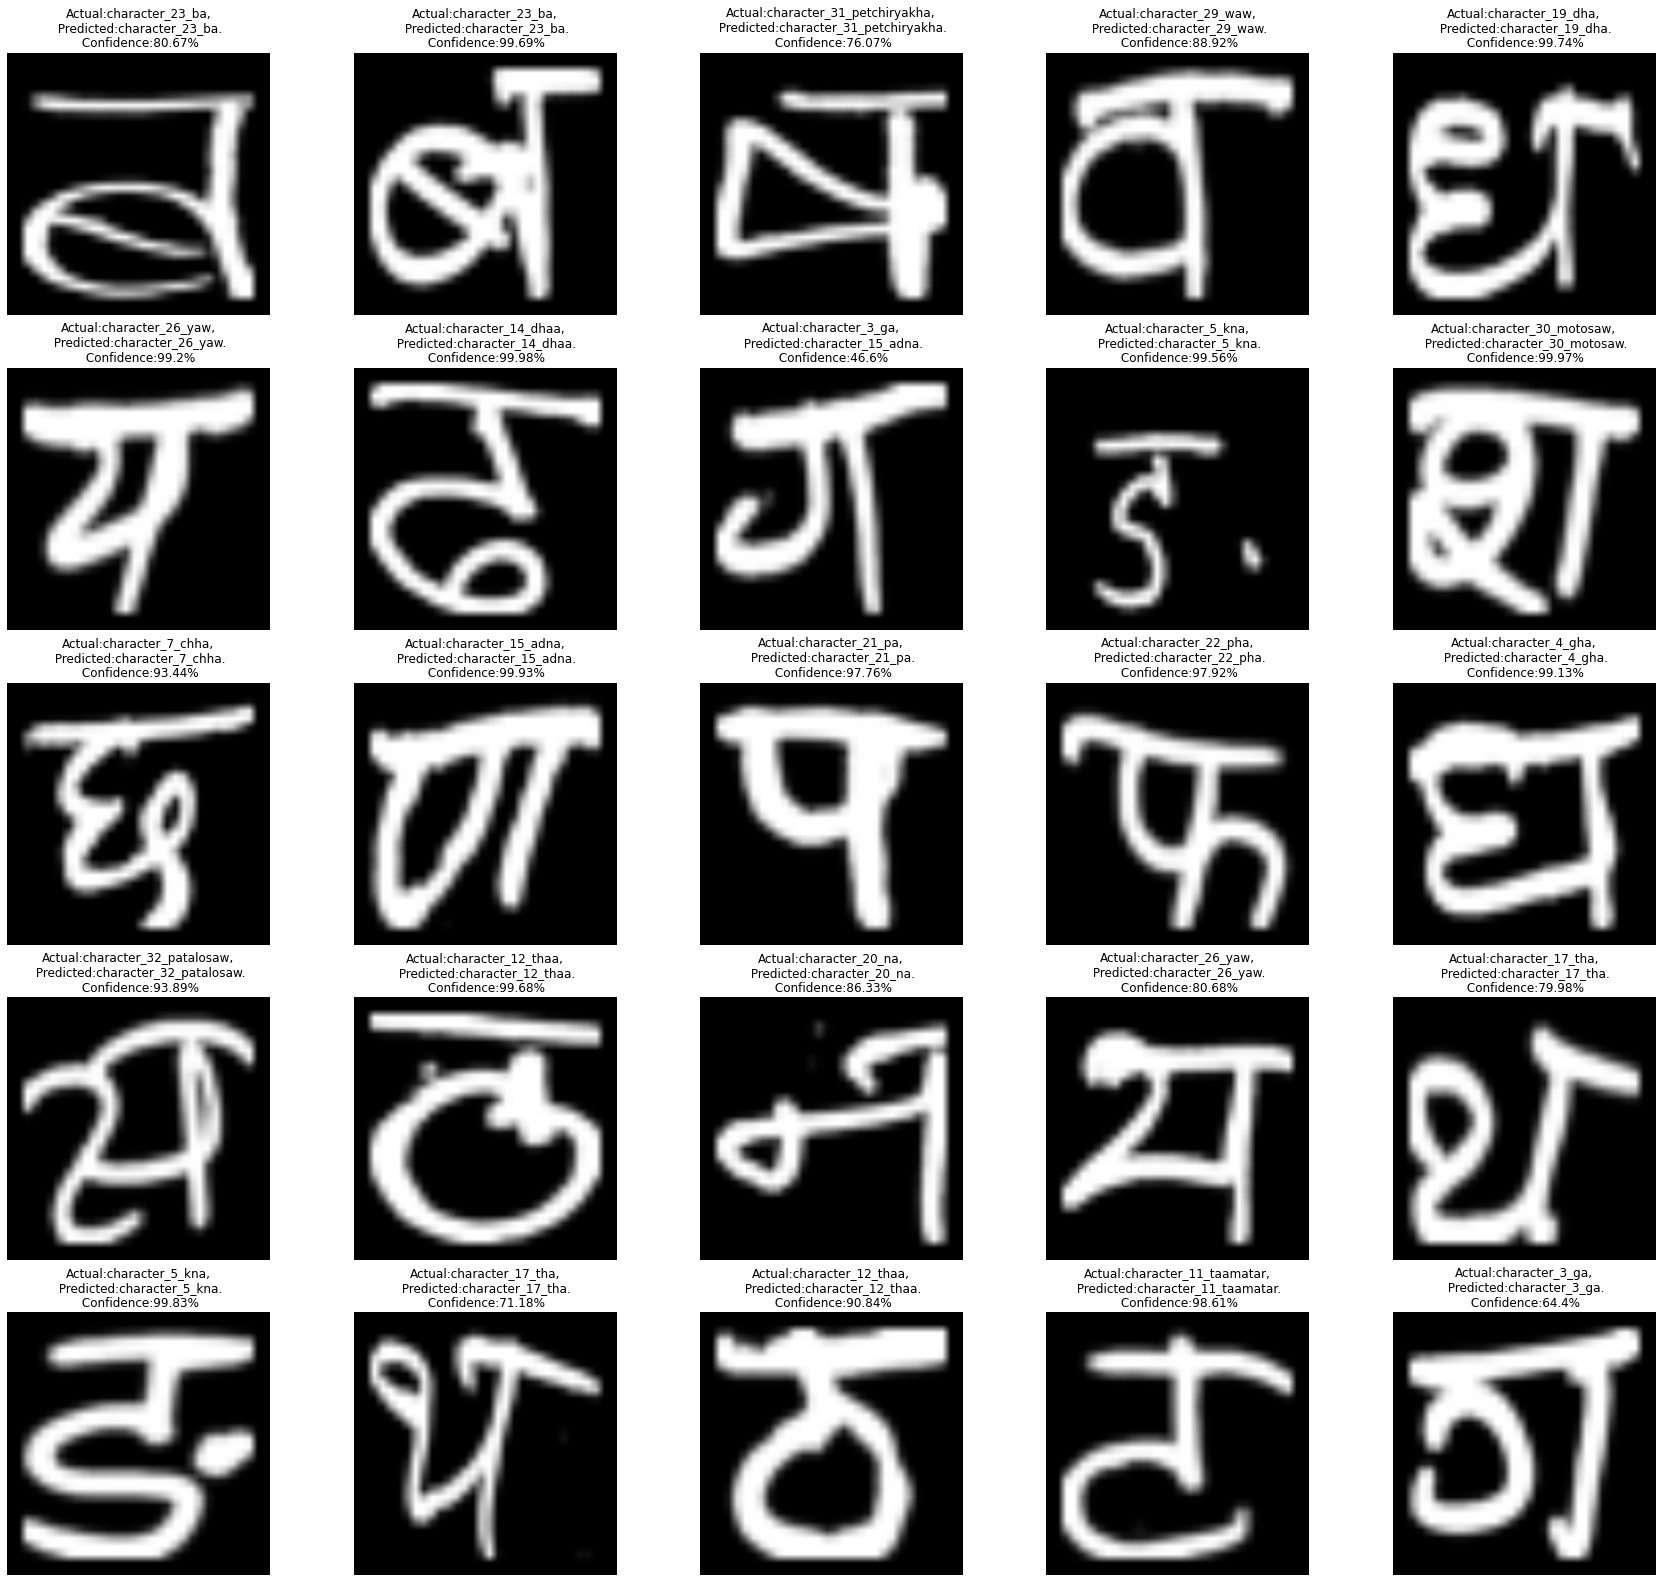

In [37]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

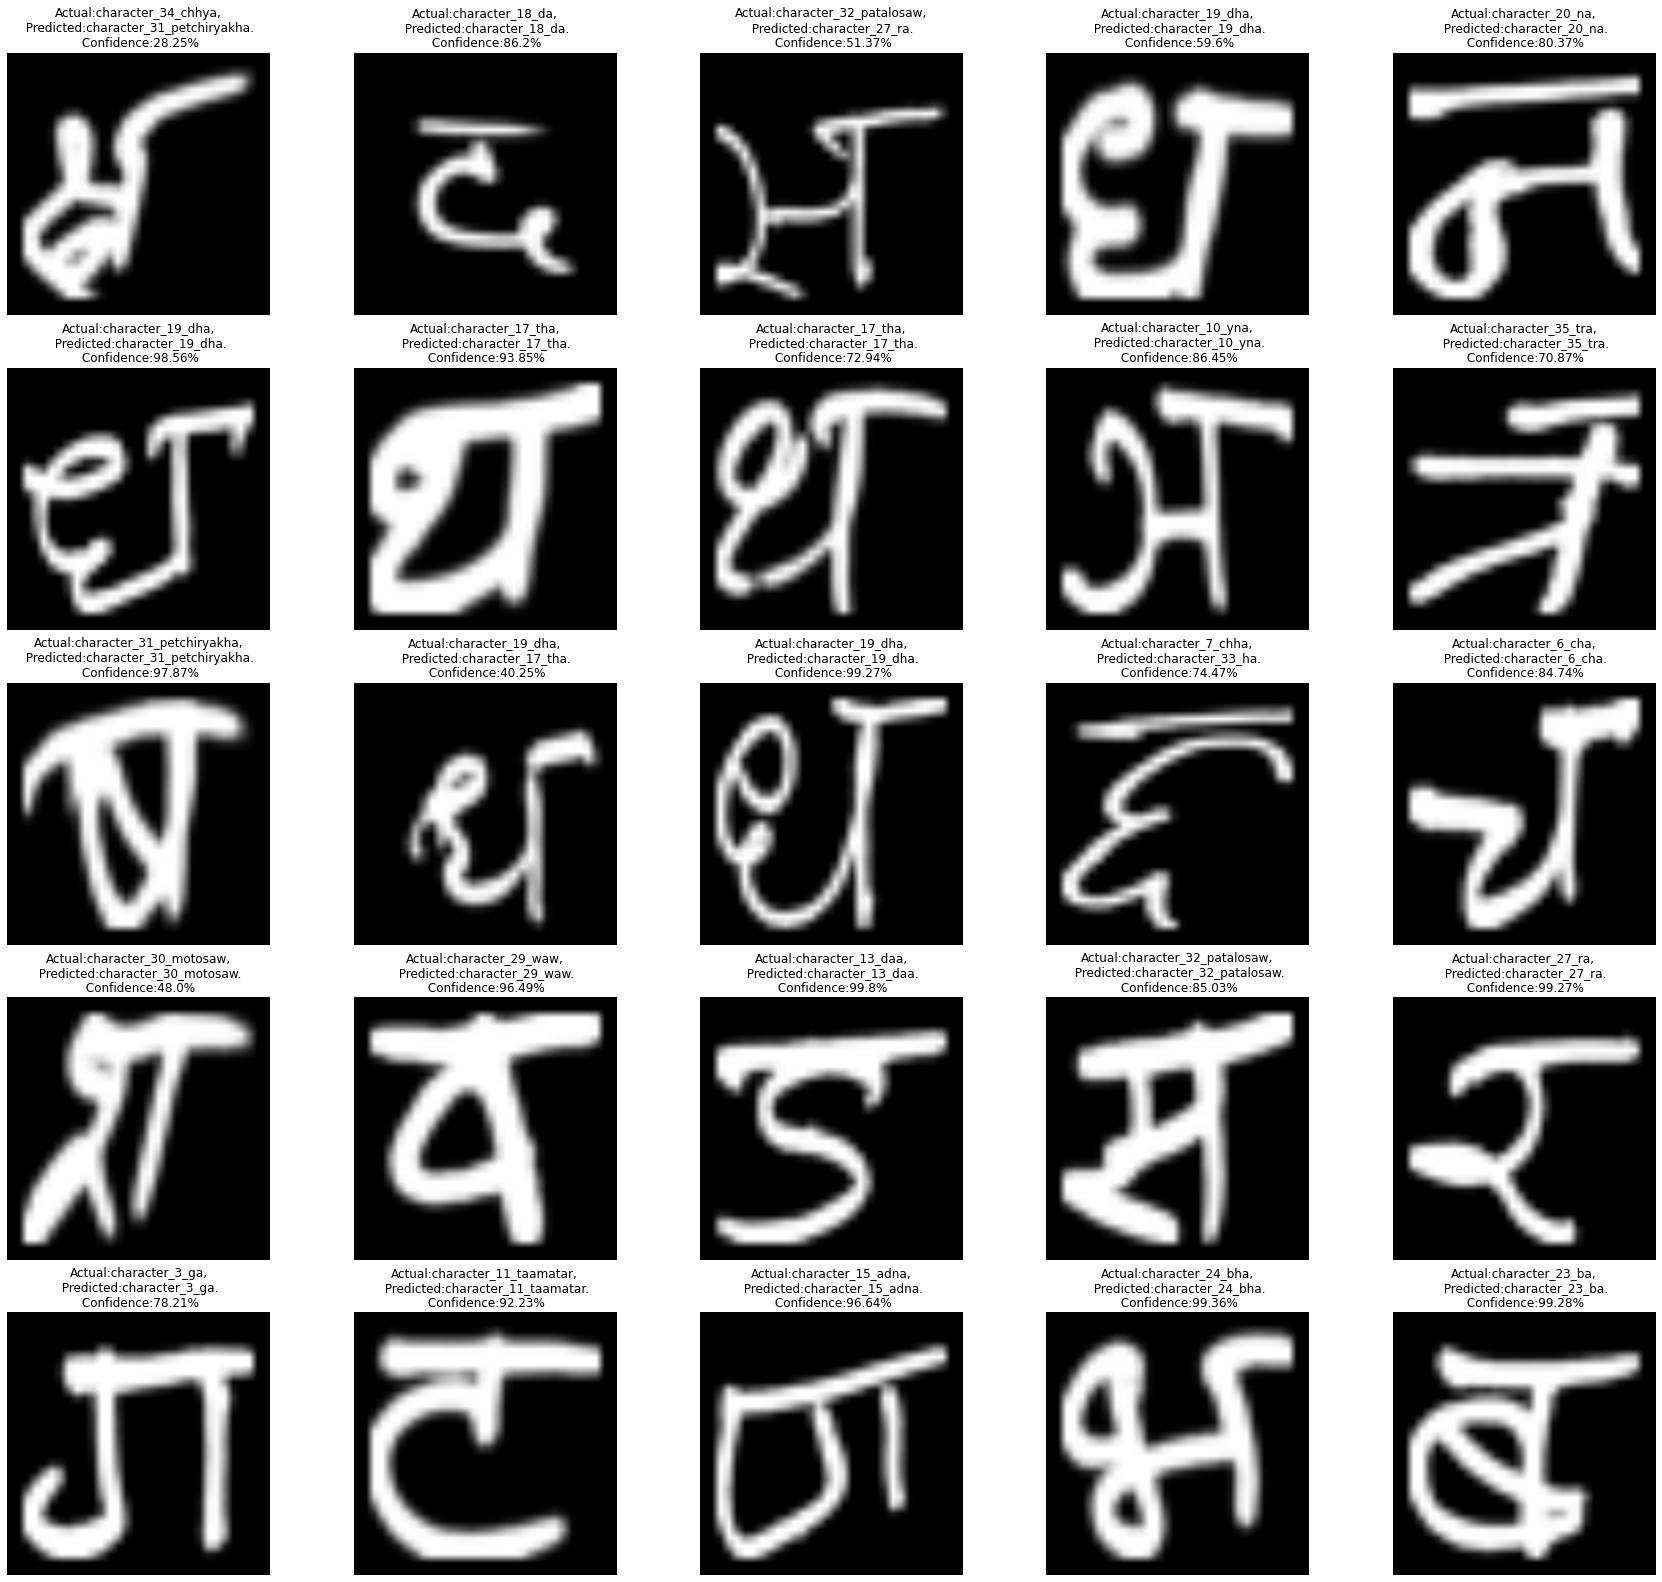

In [38]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

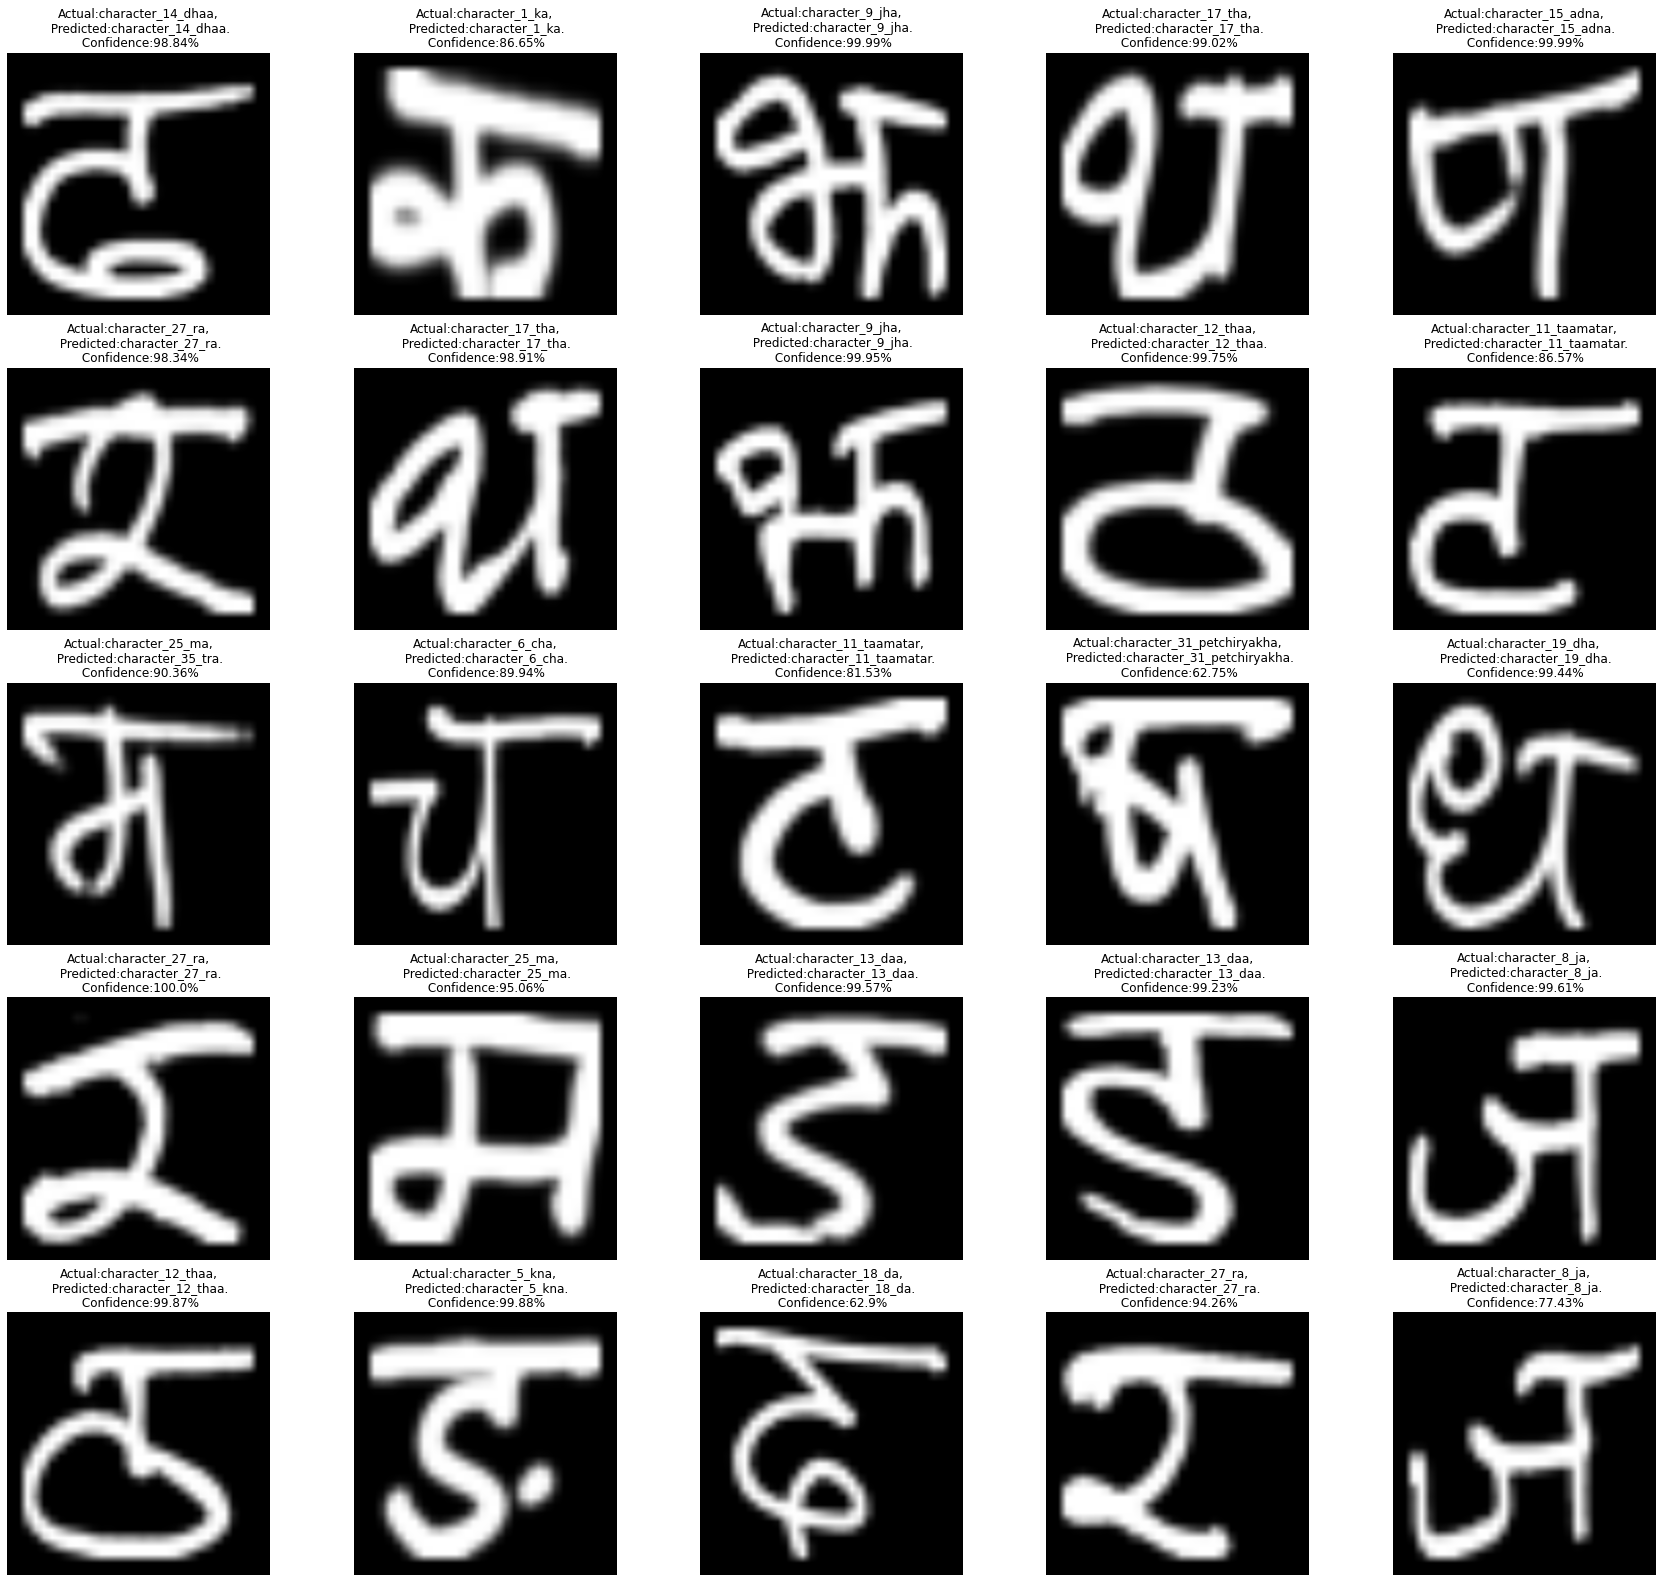

In [39]:
 plt.figure(figsize=(30,28))
for images, labels in test_ds.take(3):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')